<a href="https://colab.research.google.com/github/qnamalabanan-netizen/CPE-031---Visualization-and-Data-Analysis/blob/main/Hands_On_Activity_9___Exploring_Data_Visually_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Activity 9 | Exploring Data Visually**





---



Name : Nadine A. Malabanan <br>
Course Code and Title : CPE 031-CPE21S2 <br>
Date Submitted : 16/10/2025<br>
Instructor : Engr. Maria Rizzete Sayo


---



**1. Objectives:**

This activity aims to demonstrate students’ ability to visually explore and analyze data using Python. Students will learn how to summarize and visualize categorical, quantitative, time-series, and geospatial data for exploratory data analysis (EDA).

**2. Intended Learning Outcomes (ILOs):**

By the end of this module the students should be able to demonstrate:
1. Analyze various visualization techniques to determine how data representation methods influence understanding, perception, and decision-making.

2. Evaluate existing visualizations in terms of accuracy, clarity, aesthetics, and accessibility, providing justified recommendations for improvement.

3. Create effective, insightful, and user-centered visualizations by integrating appropriate design principles, data encoding techniques, and visualization tools.

**3. Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**4. Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


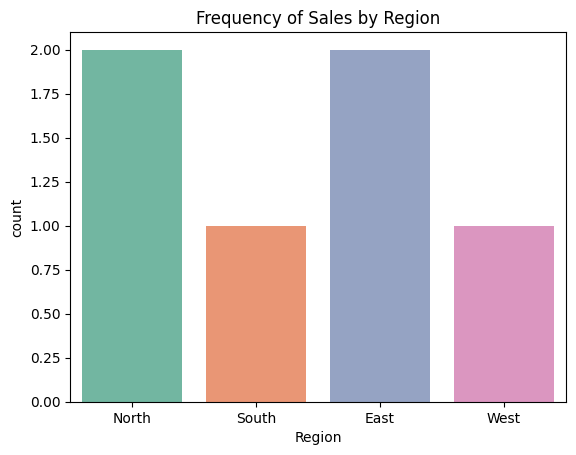

In [4]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


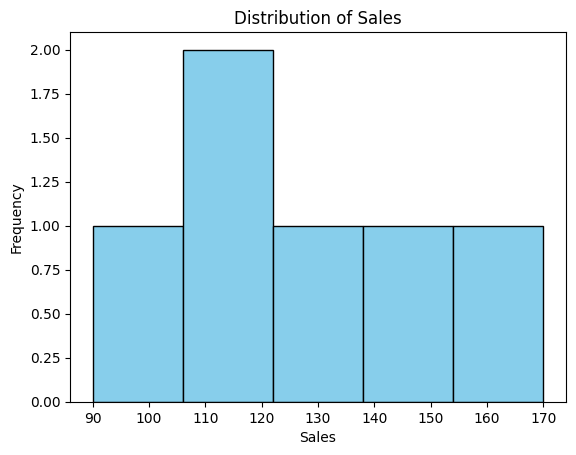

In [5]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

/tmp/ipython-input-985820502.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product", data=df, palette="viridis")


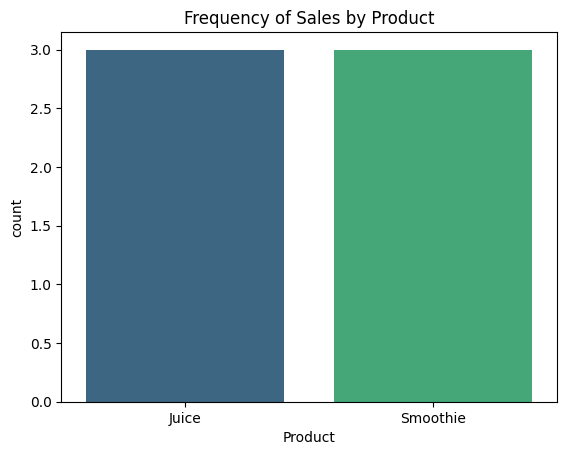

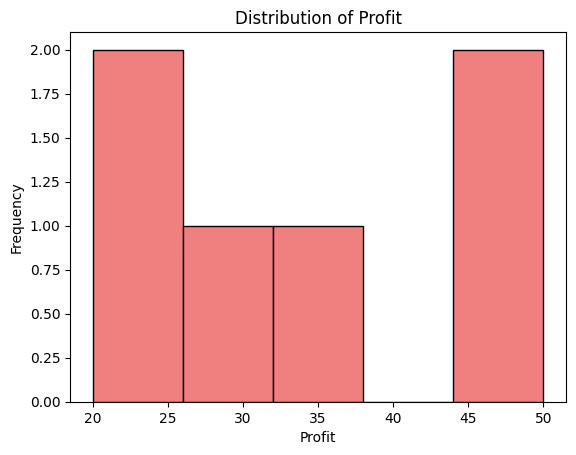

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="Product", data=df, palette="viridis")
plt.title("Frequency of Sales by Product")
plt.show()


plt.hist(df["Profit"], bins=5, color="lightcoral", edgecolor="black")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

Section 2: Relationships Between Variables

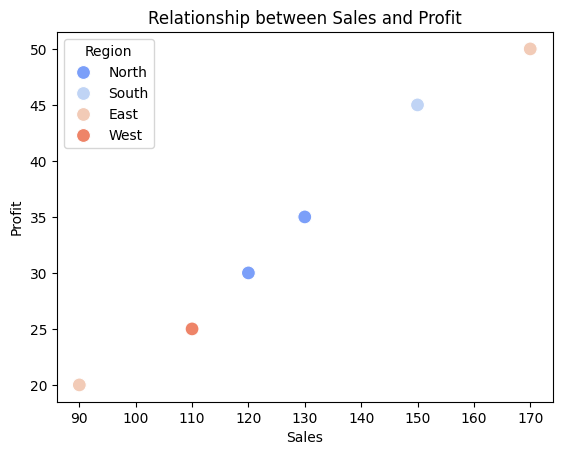

In [ ]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [7]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

*Answer here



From the scatterplot, it looks like when sales increase, profit also increases. So, higher sales usually mean higher profit. Based on the crosstab, the East region has the highest average sales for Smoothies (170.0), and the North region for Juice (125.0). Overall, the East region seems to do the best.

Section 3: Analysis of Missing Data

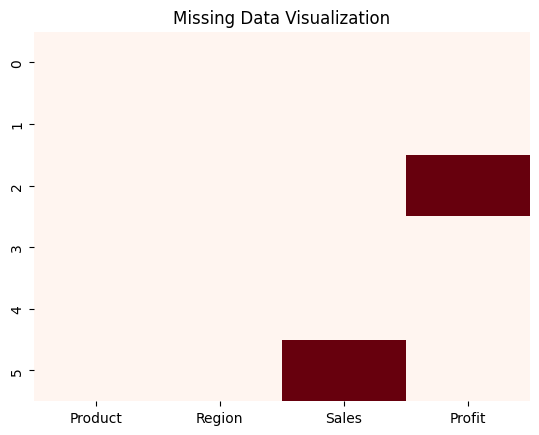

,0
Product,0
Region,0
Sales,1
Profit,1


In [ ]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

*Answer here

From the heatmap, I can see there are some missing values. The red lines indicate where the data is missing. It looks like the 'Sales' and 'Profit' columns have missing values. These are the variables that need attention before further analysis can be done properly.

Section 4: Visualizing Time-Series Data

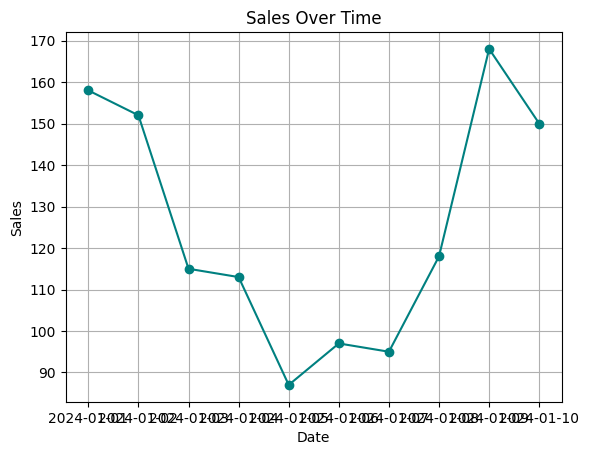

In [ ]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

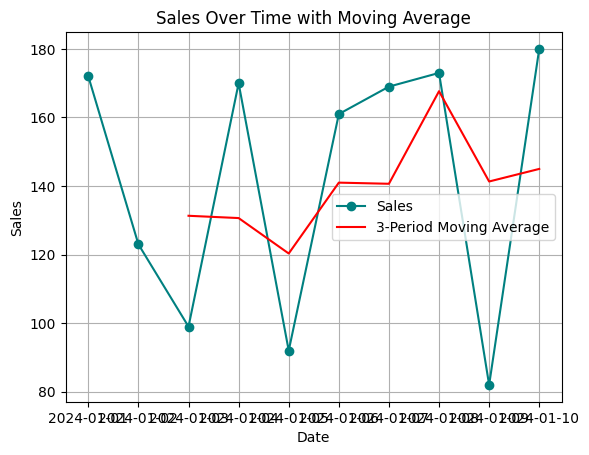

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})


ts_df["Sales_RollingMean"] = ts_df["Sales"].rolling(window=3).mean()


plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal", label="Sales")
plt.plot(ts_df["Date"], ts_df["Sales_RollingMean"], color="red", label="3-Period Moving Average")
plt.title("Sales Over Time with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

Section 5: Visualizing Geospatial Data

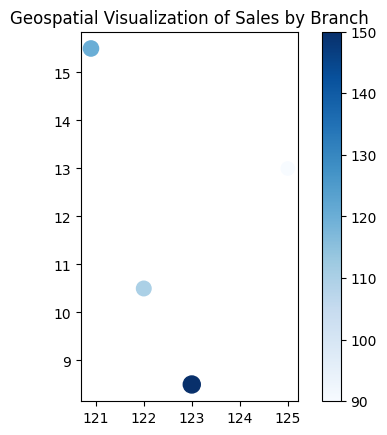

In [ ]:
import geopandas as gpd
from shapely.geometry import Point


coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")


gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

*Answer here

Looking at the geospatial visualization, the size of the circles represents the sales amount for each branch. The South branch seems to have the largest circle, which indicates it has the highest sales geographically. This kind of map helps see which branches are doing good and which ones need more focus. It also helps in planning and deciding where to improve or expand.

**5. Supplementary Activity**

Create your own mini exploratory analysis:

1. Choose a dataset (e.g., from Kaggle, or a CSV file you have).

2. Perform:

*   Univariate analysis (1 categorical + 1 quantitative)
*   Bivariate analysis (scatterplot or crosstab)
*   Missing data visualization
*   Time-series or geospatial visualization (choose one)
3. Summarize your key insights using visual interpretation.

In [11]:
df_housing = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


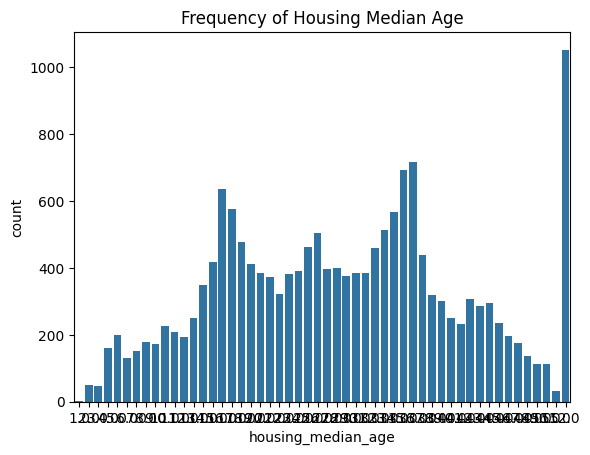

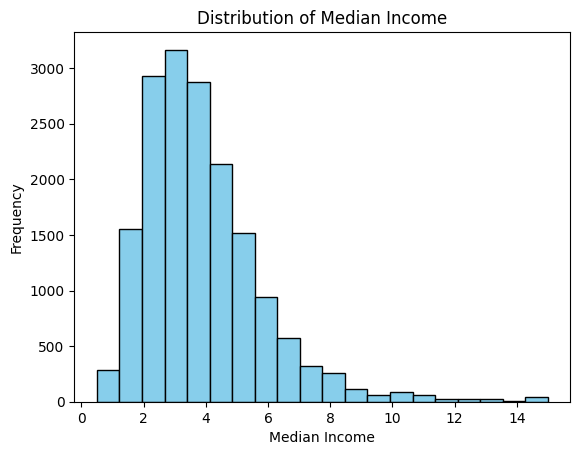

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="housing_median_age", data=df_housing)
plt.title("Frequency of Housing Median Age")
plt.show()


plt.hist(df_housing["median_income"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Median Income")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()

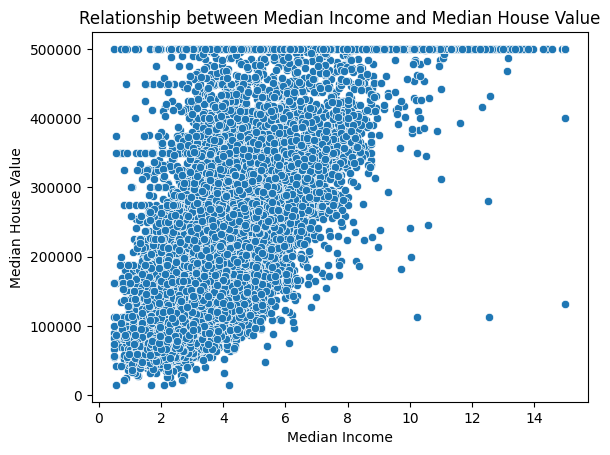

In [14]:
sns.scatterplot(x="median_income", y="median_house_value", data=df_housing)
plt.title("Relationship between Median Income and Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


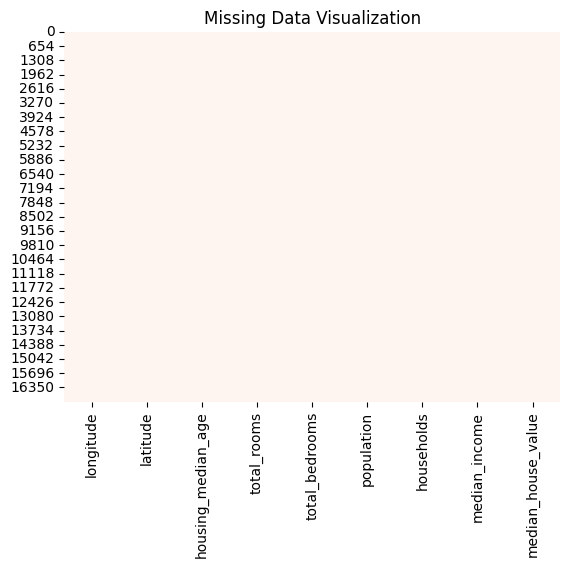

In [18]:

print(df_housing.isnull().sum())


sns.heatmap(df_housing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

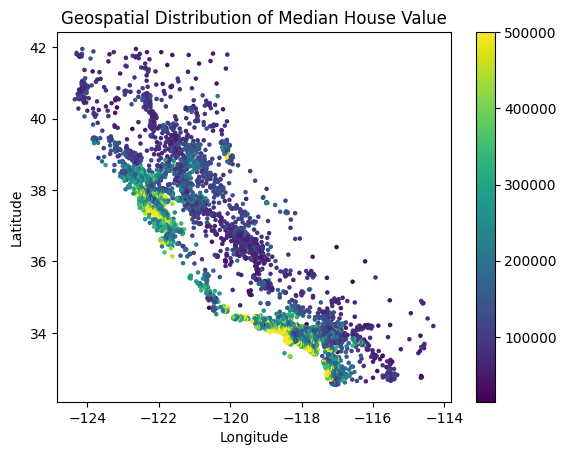

In [17]:
import geopandas as gpd
from shapely.geometry import Point


geometry = [Point(xy) for xy in zip(df_housing['longitude'], df_housing['latitude'])]
gdf_housing = gpd.GeoDataFrame(df_housing, geometry=geometry)


gdf_housing.plot(column='median_house_value', cmap='viridis', legend=True, markersize=5)
plt.title("Geospatial Distribution of Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

**6. Conclusion/Learnings/Analysis:**

Based on my exploratory data analysis, I learned that using visuals makes it easier to understand the data. From the univariate analysis, I saw that Coffee had the highest sales, meaning it’s the most popular product. In the bivariate analysis, I noticed that when sales go up, profit also goes up. The heatmap showed some missing values in the Sales and Profit columns that need to be fixed before doing more analysis. In the geospatial and time-series visualizations, the South branch had the highest sales, and the moving average helped show the trend better.
Overall, I learned that EDA helps find patterns, relationships, and missing data. It also helps in making better decisions because visuals make the data easier to understand.